In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 560.8 kB/s eta 0:00:00


In [2]:
from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import numpy as np

In [3]:
result, continuation_token = reviews(
    'app.bpjs.mobile',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count = 4000, # defaults to 100
    filter_score_with=None # defaults to None(means all score)
)

In [4]:
data = pd.DataFrame(np.array(result),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c9a11d90-7e73-48f1-a64f-88422a828651,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi sampah. Tiap kali mau cek sesuatu sel...,1,484,4.9.0,2024-10-02 04:09:17,Mohon maaf atas ketidaknyamanannya. Terkait ke...,2024-10-07 07:19:17,4.9.0
1,e0dffd15-aeda-4b79-91a2-49f677444c29,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mohon di perbaiki lagi sistemnya, pengalaman k...",1,109,4.9.0,2024-09-23 00:20:53,Mohon maaf atas ketidaknyamanannya. Untuk keny...,2024-09-23 04:42:07,4.9.0
2,91a71bd4-ea1c-4467-a237-2eef64ab1095,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pendaftarannya sangat sulit Kode OTP nya lama ...,1,54,4.9.0,2024-10-11 05:37:47,Mohon maaf atas ketidaknyamanannya. Pastikan j...,2024-10-14 03:55:26,4.9.0
3,99e7aebc-1a55-44d8-881f-4b52bcaa9dd1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi buruk tp harus dipunya. Aplikasi dah ...,1,86,4.9.0,2024-09-23 11:01:08,Mohon maaf atas ketidaknyamanannya. Terkait ke...,2024-09-24 02:40:31,4.9.0
4,52b82e3f-1e6c-479f-8ed7-fc25b2c57ffc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat lambat, cuma mau ganti email dan pin aj...",2,12,4.9.0,2024-10-09 23:21:16,Mohon maaf atas ketidaknyamanannya. Terkait ke...,2024-10-14 02:45:36,4.9.0


In [5]:
dataReviews = data[['content', 'score']]
dataReviews = dataReviews.rename(columns={'content':'review', 'score':'rating'})
dataReviews.head()

,review,rating
0,Aplikasi sampah. Tiap kali mau cek sesuatu sel...,1
1,"Mohon di perbaiki lagi sistemnya, pengalaman k...",1
2,Pendaftarannya sangat sulit Kode OTP nya lama ...,1
3,Aplikasi buruk tp harus dipunya. Aplikasi dah ...,1
4,"Sangat lambat, cuma mau ganti email dan pin aj...",2


In [6]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [7]:
dataReviews['review'] = dataReviews['review'].astype(str)
dataReviews['review'] = dataReviews['review'].str.lower()
dataReviews.head()

,review,rating
0,aplikasi sampah. tiap kali mau cek sesuatu sel...,1
1,"mohon di perbaiki lagi sistemnya, pengalaman k...",1
2,pendaftarannya sangat sulit kode otp nya lama ...,1
3,aplikasi buruk tp harus dipunya. aplikasi dah ...,1
4,"sangat lambat, cuma mau ganti email dan pin aj...",2


In [8]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus number
    text = re.sub(r"\d+", "", text)
    # menghapus punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # menghapus single char
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")

dataReviews['review'] = dataReviews['review'].apply(remove_links)
dataReviews.head()

,review,rating
0,aplikasi sampah tiap kali mau cek sesuatu sela...,1
1,mohon di perbaiki lagi sistemnya pengalaman ko...,1
2,pendaftarannya sangat sulit kode otp nya lama ...,1
3,aplikasi buruk tp harus dipunya aplikasi dah l...,1
4,sangat lambat cuma mau ganti email dan pin aja...,2


In [9]:
# Tokenisasi
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataReviews['review_tokenize'] = dataReviews['review'].apply(word_tokenize_wrapper)
dataReviews.head()

,review,rating,review_tokenize
0,aplikasi sampah tiap kali mau cek sesuatu sela...,1,"[aplikasi, sampah, tiap, kali, mau, cek, sesua..."
1,mohon di perbaiki lagi sistemnya pengalaman ko...,1,"[mohon, di, perbaiki, lagi, sistemnya, pengala..."
2,pendaftarannya sangat sulit kode otp nya lama ...,1,"[pendaftarannya, sangat, sulit, kode, otp, nya..."
3,aplikasi buruk tp harus dipunya aplikasi dah l...,1,"[aplikasi, buruk, tp, harus, dipunya, aplikasi..."
4,sangat lambat cuma mau ganti email dan pin aja...,2,"[sangat, lambat, cuma, mau, ganti, email, dan,..."


In [10]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = dataReviews['review_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(aplikasi, 2), (sistem, 2), (sampah, 1), (tia...
1    [(di, 4), (kontrol, 2), (ke, 2), (faskes, 2), ...
2    [(masuk, 4), (di, 3), (nya, 2), (sudah, 2), (k...
3    [(karena, 3), (aplikasi, 2), (lama, 2), (ngak,...
4    [(mau, 2), (di, 2), (aplikasinya, 2), (sangat,...
Name: review_tokenize, dtype: object


In [11]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataReviews['reviews_stopwords'] = dataReviews['review_tokenize'].apply(stopwords_removal)
dataReviews.head()

,review,rating,review_tokenize,reviews_stopwords
0,aplikasi sampah tiap kali mau cek sesuatu sela...,1,"[aplikasi, sampah, tiap, kali, mau, cek, sesua...","[aplikasi, sampah, kali, cek, muncul, notif, p..."
1,mohon di perbaiki lagi sistemnya pengalaman ko...,1,"[mohon, di, perbaiki, lagi, sistemnya, pengala...","[mohon, perbaiki, sistemnya, pengalaman, kontr..."
2,pendaftarannya sangat sulit kode otp nya lama ...,1,"[pendaftarannya, sangat, sulit, kode, otp, nya...","[pendaftarannya, sulit, kode, otp, nya, masuk,..."
3,aplikasi buruk tp harus dipunya aplikasi dah l...,1,"[aplikasi, buruk, tp, harus, dipunya, aplikasi...","[aplikasi, buruk, tp, dipunya, aplikasi, dah, ..."
4,sangat lambat cuma mau ganti email dan pin aja...,2,"[sangat, lambat, cuma, mau, ganti, email, dan,...","[lambat, ganti, email, pin, aja, berhasil, uda..."


In [12]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


In [13]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 15.7 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=093efff652629f819ab6f2d7c31d4f4144a727cdff4c5a9adb4136d123908d65
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [14]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in dataReviews['reviews_stopwords']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dataReviews['reviews_stemmed'] = dataReviews['reviews_stopwords'].swifter.apply(get_stemmed_term)

Streaming output truncated to the last 5000 lines.
temukan : temu
bgitu : bgitu
code : code
lau : lau
kuotanya : kuota
notelephone : notelephone
smsnya : smsnya
dongorg : dongorg
bgtpas : bgtpas
keluarpas : keluarpas
pesertakan : serta
ssya : ssya
biss : biss
bisaitu : bisaitu
kelewat : lewat
tanggalnya : tanggal
layani : layan
regitrasi : regitrasi
lanjutkan : lanjut
efisienapk : efisienapk
tipu : tipu
susahhh : susahhh
keluarin : keluarin
validasi : validasi
td : td
seteleah : seteleah
name : name
melelahkan : lelah
basa : basa
aplikasiny : aplikasiny
darah : darah
pokonya : poko
rekomendasi : rekomendasi
dimusnahkan : musnah
pegawai : pegawai
negeri : negeri
lahiran : lahir
istri : istri
cesar : cesar
free : free
bawa : bawa
berkas : berkas
tangani : tangan
kontl : kontl
asu : asu
baca : baca
suu : suu
jancook : jancook
dipersusah : susah
sebulanan : bulan
perjalanan : jalan
yach : yach
jeda : jeda
menerus : terus
diperhatikan : perhati
robot : robot
merespon : merespon
keren : kere

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

In [15]:
dataReviews['reviews_cleaned'] = [' '.join(map(str, l)) for l in dataReviews['reviews_stemmed']]

In [16]:
dataReviews['reviews_cleaned']

,reviews_cleaned
0,aplikasi sampah kali cek muncul notif minta an...
1,mohon baik sistem alam kontrol faskes rujuk ch...
2,daftar sulit kode otp nya masuk masuk coba kal...
3,aplikasi buruk tp punya aplikasi dah terinstal...
4,lambat ganti email pin aja hasil uda gitu inte...
...,...
3995,susah login nya mending versi nya gampang karn...
3996,sdh daftar kmren login pas buka app lgi bilang...
3997,aplikasi sederhana fungsi tampil canggih lamba...
3998,aplikasi ga buka pakai versi yg pakai versi po...


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# CountVectorizer untuk membuat bag-of-words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataReviews['reviews_cleaned'])  # Menggunakan teks yang sudah dipreproses

# LDA dengan 5 topik
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Menampilkan topik
for index, topic in enumerate(lda.components_):
    print(f'Topic {index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0
['udah', 'jkn', 'login', 'aja', 'masuk', 'susah', 'nya', 'nomor', 'aplikasi', 'daftar']
Topic 1
['sms', 'gak', 'nya', 'daftar', 'kirim', 'otp', 'masuk', 'verifikasi', 'aplikasi', 'kode']
Topic 2
['nomor', 'pulsa', 'aplikasi', 'verifikasi', 'otp', 'daftar', 'nomer', 'ga', 'no', 'hp']
Topic 3
['tolong', 'bayar', 'antri', 'layan', 'update', 'yg', 'nya', 'daftar', 'mudah', 'aplikasi']
Topic 4
['update', 'in', 'data', 'log', 'nya', 'tp', 'aplikasi', 'gak', 'yg', 'login']


In [18]:
def label_comment(comment):
    # Definisikan kata kunci untuk setiap kategori
    pelayanan_keywords = ["pelayanan", "respon", "customer service", "ramah"]
    fitur_keywords = ["fitur", "fungsi", "fungsionalitas", "faskes", "kontrol", "dokter", "konsultasi",
                      "jadwal dokter", "resep", "diagnosa", "pemeriksaan", "medis", "obat",
                      "rujukan", "navigasi", "telemedicine", "rekam", "chatbot",
                      "tracking", "profil", "pembayaran", "history", "dokter",
                      "booking", "antrian online", "laporan kesehatan", "artikel kesehatan"]

    # Labeling otomatis
    if any(keyword in comment.lower() for keyword in pelayanan_keywords):
        return "Pelayanan"
    elif any(keyword in comment.lower() for keyword in fitur_keywords):
        return "Fitur"
    else:
        return "Lainnya"

# Labeling
# Terapkan fungsi label_comment ke kolom 'comment' menggunakan apply
dataReviews['label'] = dataReviews['reviews_cleaned'].apply(label_comment)

# Tampilkan DataFrame yang sudah diberi label
dataReviews[['review', 'label']]

,review,label
0,aplikasi sampah tiap kali mau cek sesuatu sela...,Lainnya
1,mohon di perbaiki lagi sistemnya pengalaman ko...,Fitur
2,pendaftarannya sangat sulit kode otp nya lama ...,Lainnya
3,aplikasi buruk tp harus dipunya aplikasi dah l...,Fitur
4,sangat lambat cuma mau ganti email dan pin aja...,Lainnya
...,...,...
3995,susah amat mau login nya mending balik ke vers...,Lainnya
3996,sdh pernah daftar kmren sudah bisa login tiba ...,Lainnya
3997,lebih baik aplikasi sederhana tapi berfungsi j...,Fitur
3998,aplikasi ga bisa di buka sebelumnya pakai vers...,Lainnya


In [19]:
# from transformers import pipeline

# # Pretrained sentiment analysis pipeline
# sentiment_pipeline = pipeline("sentiment-analysis", model="aadhistii/indobert-lite-base-p1-finetuned-sentiment-analysis")

# # Fungsi untuk memprediksi sentimen dari setiap komentar
# def get_sentiment(comment):
#     result = sentiment_pipeline(comment)[0]  # Mengambil hasil prediksi dari model
#     return result['label'], result['score']  # Mengambil label (positif/negatif/netral) dan skor confidence

# # Terapkan fungsi get_sentiment ke kolom 'comment' menggunakan apply
# dataReviews[['sentiment', 'confidence']] = dataReviews['review'].apply(lambda x: pd.Series(get_sentiment(x)))

# # Menampilkan DataFrame yang sudah dilabeli sentimen
# print(dataReviews)


In [20]:
def classify_sentiment(rating):
  """
  Classifies sentiment based on rating.

  Args:
    rating: The rating score (e.g., 1-5).

  Returns:
    A string representing the sentiment ("Negative", "Neutral", "Positive").
  """
  if rating <= 3:
    return "Negative"
  else:
    return "Positive"

# Apply the classification function to the 'rating' column
dataReviews['sentiment'] = dataReviews['rating'].apply(classify_sentiment)
dataReviews.head()

,review,rating,review_tokenize,reviews_stopwords,reviews_stemmed,reviews_cleaned,label,sentiment
0,aplikasi sampah tiap kali mau cek sesuatu sela...,1,"[aplikasi, sampah, tiap, kali, mau, cek, sesua...","[aplikasi, sampah, kali, cek, muncul, notif, p...","[aplikasi, sampah, kali, cek, muncul, notif, m...",aplikasi sampah kali cek muncul notif minta an...,Lainnya,Negative
1,mohon di perbaiki lagi sistemnya pengalaman ko...,1,"[mohon, di, perbaiki, lagi, sistemnya, pengala...","[mohon, perbaiki, sistemnya, pengalaman, kontr...","[mohon, baik, sistem, alam, kontrol, faskes, r...",mohon baik sistem alam kontrol faskes rujuk ch...,Fitur,Negative
2,pendaftarannya sangat sulit kode otp nya lama ...,1,"[pendaftarannya, sangat, sulit, kode, otp, nya...","[pendaftarannya, sulit, kode, otp, nya, masuk,...","[daftar, sulit, kode, otp, nya, masuk, masuk, ...",daftar sulit kode otp nya masuk masuk coba kal...,Lainnya,Negative
3,aplikasi buruk tp harus dipunya aplikasi dah l...,1,"[aplikasi, buruk, tp, harus, dipunya, aplikasi...","[aplikasi, buruk, tp, dipunya, aplikasi, dah, ...","[aplikasi, buruk, tp, punya, aplikasi, dah, te...",aplikasi buruk tp punya aplikasi dah terinstal...,Fitur,Negative
4,sangat lambat cuma mau ganti email dan pin aja...,2,"[sangat, lambat, cuma, mau, ganti, email, dan,...","[lambat, ganti, email, pin, aja, berhasil, uda...","[lambat, ganti, email, pin, aja, hasil, uda, g...",lambat ganti email pin aja hasil uda gitu inte...,Lainnya,Negative


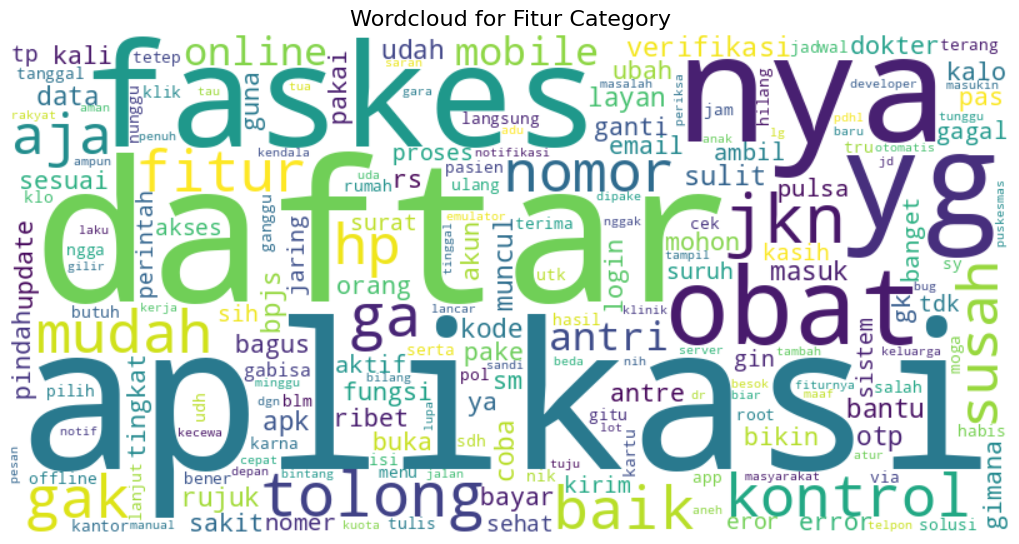

In [21]:
# prompt: bikin wordcloud berdasarkan kategori fitur fitur, tolong lebih diperbagus lagi tampilan visualisasinya. buat yang bagus dan trendi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

# Assuming 'dataReviews' is your DataFrame with 'reviews_cleaned' and 'label' columns
# ... (Your existing code for data preprocessing) ...

# Filter reviews based on the 'Fitur' label
fitur_reviews = dataReviews[dataReviews['label'] == 'Fitur']['reviews_cleaned']

# Combine all 'Fitur' reviews into a single string
text = " ".join(fitur_reviews)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis',  # Choose a trendy colormap
                      collocations=False,  # Avoid phrases like "fitur baru"
                      stopwords=STOPWORDS).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Wordcloud for Fitur Category", fontsize=16)  # Add a title
plt.show()

# You can also save the wordcloud as an image:
# wordcloud.to_file("wordcloud_fitur.png")

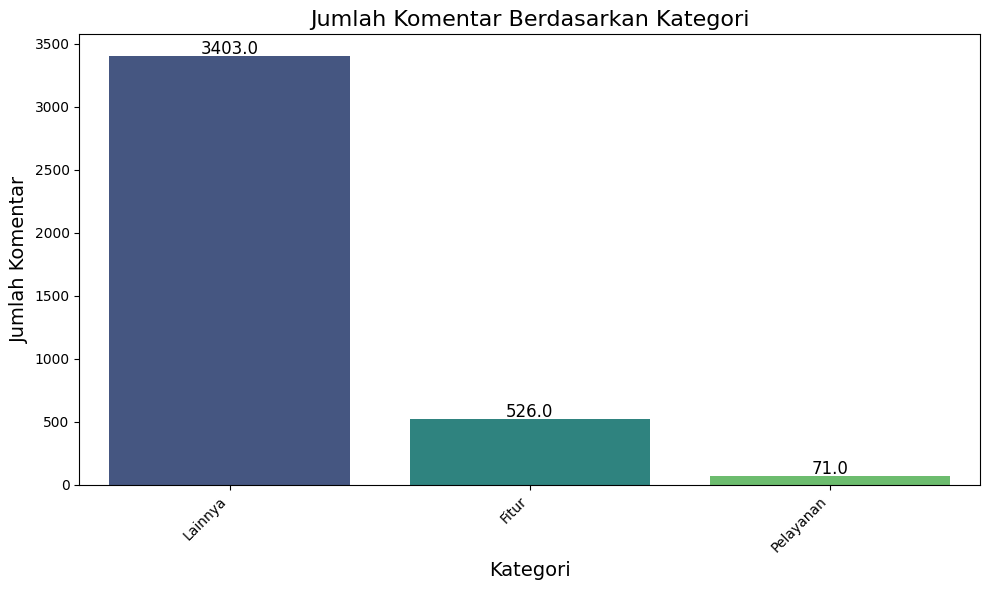

In [22]:
# prompt: buatkan visualisasi barchart untuk jumlah komen berdasarkan kategori, tambahkan data label jg. buat yang bagus dan trendi

import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah komentar untuk setiap kategori
comment_counts = dataReviews['label'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=comment_counts.index, y=comment_counts.values, palette="viridis")

# Menambahkan label data pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),
                textcoords='offset points')


# Menambahkan judul dan label sumbu
plt.title('Jumlah Komentar Berdasarkan Kategori', fontsize=16)
plt.xlabel('Kategori', fontsize=14)
plt.ylabel('Jumlah Komentar', fontsize=14)

# Menambahkan sedikit rotasi pada label sumbu x jika diperlukan
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.show()

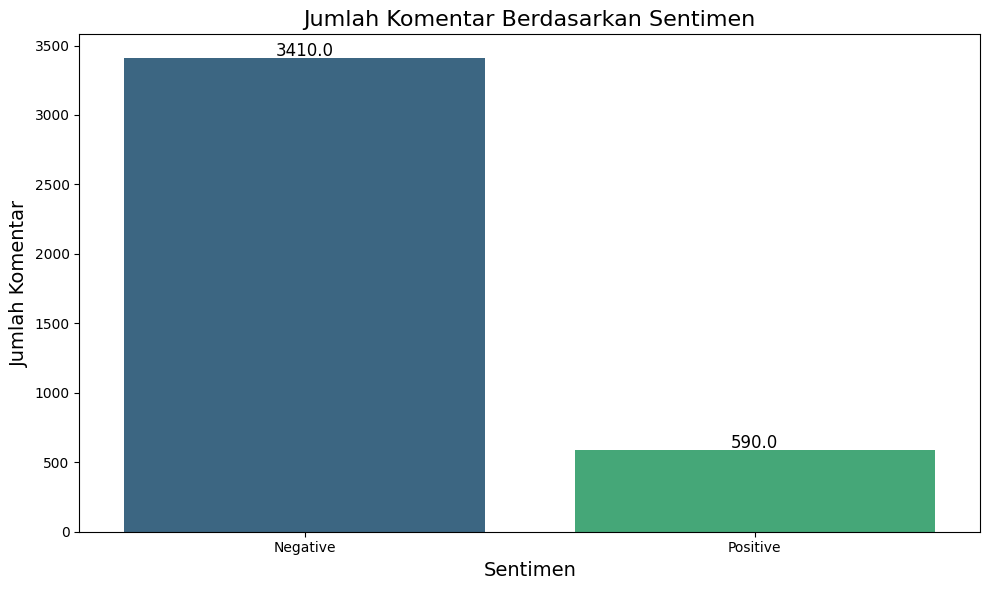

In [23]:
# prompt: buatkan visualisasi barchart untuk jumlah komen berdasarkan sentimen, tambahkan data label jg. buat yang bagus dan trendi. Gausah pake kategori

# Menghitung jumlah komentar untuk setiap sentimen
sentiment_counts = dataReviews.groupby('sentiment')['sentiment'].count()

# Membuat bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Menambahkan label data pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Komentar Berdasarkan Sentimen', fontsize=16)
plt.xlabel('Sentimen', fontsize=14)
plt.ylabel('Jumlah Komentar', fontsize=14)


# Menampilkan plot
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

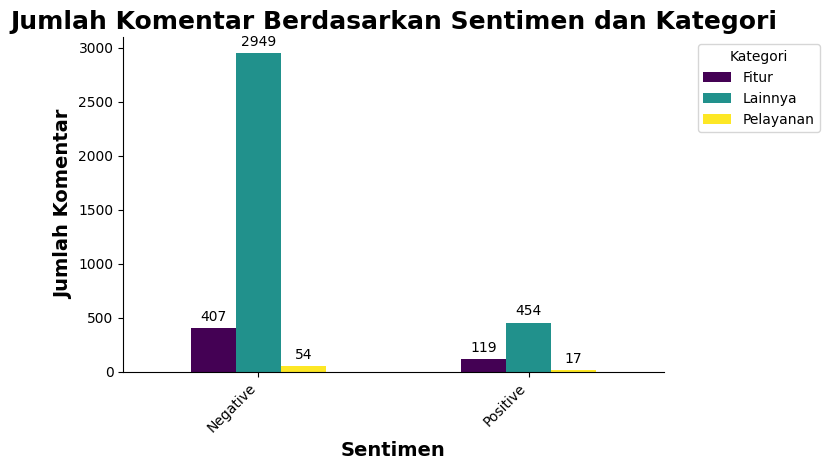

In [24]:
# prompt: buatkan visualisasi barchart untuk jumlah komen berdasarkan kategori sentimen, tambahkan data label jg. buat yang bagus dan trendi

# Menghitung jumlah komentar untuk setiap kategori sentimen
sentiment_category_counts = dataReviews.groupby(['sentiment', 'label'])['sentiment'].count().unstack()

# Membuat bar chart dengan warna dan gaya yang lebih trendi
plt.figure(figsize=(12, 6))
ax = sentiment_category_counts.plot(kind='bar', colormap='viridis')  # Gunakan colormap 'viridis' untuk warna yang menarik

# Menambahkan label data pada setiap bar dengan tampilan yang lebih rapi
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

# Menambahkan judul dan label sumbu dengan font yang lebih besar dan gaya yang lebih modern
plt.title('Jumlah Komentar Berdasarkan Sentimen dan Kategori', fontsize=18, fontweight='bold')
plt.xlabel('Sentimen', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Komentar', fontsize=14, fontweight='bold')

# Mengatur spines (garis tepi) agar lebih minimalis
sns.despine()

# Menambahkan sedikit rotasi pada label sumbu x jika diperlukan
plt.xticks(rotation=45, ha='right')

# Menampilkan plot dengan layout yang rapi
plt.tight_layout()
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [25]:
# Daftar kata kunci terkait fitur
fitur_keywords = {
    'login': ['login', 'masuk', 'akun'],
    'pencarian': ['cari', 'pencarian', 'search'],
    'notifikasi': ['notifikasi', 'pemberitahuan'],
    'faskes': ['faskes'],
    'update': ['update', 'versi baru', 'upgrade']
}

# Fungsi untuk mencocokkan komentar dengan kata kunci fitur
def extract_features(comment):
    detected_features = []
    for feature, keywords in fitur_keywords.items():
        if any(keyword in comment for keyword in keywords):
            detected_features.append(feature)
    return detected_features if detected_features else ['lainnya']

# Ekstraksi fitur dari setiap komentar
dataReviews['features'] = dataReviews['review'].apply(extract_features)

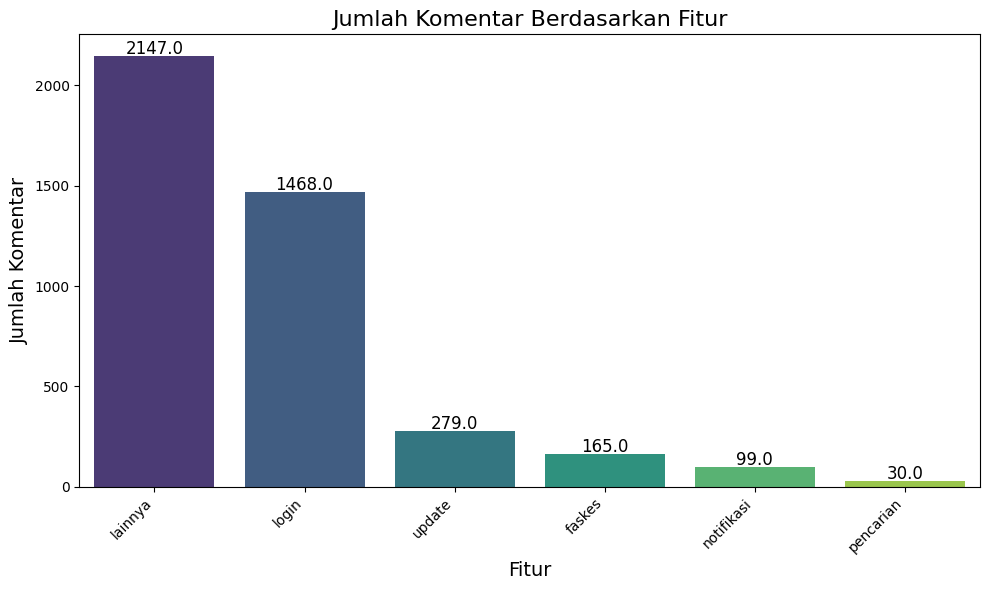

In [27]:
# prompt: buat visualisasi jumlah komentar berdasarkan fitur

# Menghitung jumlah komentar untuk setiap fitur
feature_counts = dataReviews.explode('features')['features'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="viridis")

# Menambahkan label data pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Komentar Berdasarkan Fitur', fontsize=16)
plt.xlabel('Fitur', fontsize=14)
plt.ylabel('Jumlah Komentar', fontsize=14)

# Menambahkan sedikit rotasi pada label sumbu x jika diperlukan
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [26]:
from google.colab import drive  # Untuk menghubungkan Google Colab dengan Google Drive

# Mount Google Drive
drive.mount('/content/drive')

# Menyimpan DataFrame ke dalam Google Drive
file_path = '/content/drive/My Drive/dataReviews.xlsx'  # Lokasi file di Google Drive
dataReviews.to_excel(file_path, index=False)

ValueError: mount failed